## Part I - Introduction

- This data is exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia
- The focal questions are:
    - Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
    - Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
- Both survey's will be combined to answer these questions
- Before analysis, the data needs to be cleaned and combined

In [1]:
import pandas as pd
import numpy as np
dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')

### Exploring DETE Data

In [2]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
dete_survey.isnull()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,True,True,True,True
5,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,True,True,True,True,True
6,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
7,False,False,False,False,False,False,True,False,True,False,...,False,True,False,False,False,True,True,True,True,True
8,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
9,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,True,True,True,True


In [5]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [6]:
dete_survey['Age'].value_counts()

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
20 or younger      1
Name: Age, dtype: int64

In [7]:
dete_survey['Position'].value_counts()

Teacher                                                    324
Teacher Aide                                               137
Public Servant                                             126
Cleaner                                                     97
Head of Curriculum/Head of Special Education                38
Schools Officer                                             24
School Administrative Staff                                 16
Guidance Officer                                            12
Technical Officer                                           11
Professional Officer                                         7
Other                                                        7
School Based Professional Staff (Therapist, nurse, etc)      5
School Principal                                             5
Deputy Principal                                             4
Business Service Manager                                     4
Name: Position, dtype: int64

Observations of DETE Data
- A handful of columns have very few inputted data - although it does make sense for a column like disability as it is expected that a majority of employees do not have a noted disability, others may not be as important to keep for the questions being considered such as South Sea
- At a first glance columns that may be of importance for this analysis include Seperation Type, columns involved in tracking the duration of employment, Age, Position and Dissability

### Exploring TAFE Data

In [8]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [9]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [10]:
tafe_survey.isnull()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

In [12]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

In [13]:
tafe_survey['CurrentAge. Current Age'].value_counts()

56 or older      162
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: CurrentAge. Current Age, dtype: int64

- the data and format in tafe is different then th data in dete
    - tafe has a longer and more in depth survey
- the columns that seem relevant to the prompt is reason for ceasing employment and their ages
- Additionally, it would be benificial to look at the answers for a few rows in each column to get a better understanding of the survey

## Part II - Identify Missing Values and Drop Unnecessary Columns

In [14]:
dete_survey=pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [15]:
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [16]:
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

In [17]:
# find columns dropped dete - https://stackoverflow.com/questions/48647534/python-pandas-find-difference-between-two-data-frames
set(dete_survey.columns).symmetric_difference(dete_survey_updated.columns)

{'Career Aspirations',
 'Coach',
 'Communication',
 'Feedback',
 'Further PD',
 'Health & Safety',
 'Information',
 'Initiative',
 'Kept informed',
 'My say',
 'Opportunities for promotion',
 'Peer support',
 'Performance of supervisor',
 'Physical environment',
 'Professional Development',
 'Skills',
 'Staff morale',
 'Stress and pressure support',
 'Wellness programs',
 'Worklife balance',
 'Workplace issue'}

In [18]:
# find columns dropped tafe - https://stackoverflow.com/questions/48647534/python-pandas-find-difference-between-two-data-frames
set(tafe_survey.columns).symmetric_difference(tafe_survey_updated.columns)

{'Induction. Did you undertake Workplace Induction?',
 'InductionInfo. Face to Face Topic: Did you undertake Team Induction; Category?',
 'InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?',
 'InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?',
 'InductionInfo. Induction Manual Topic: Did you undertake Team Induction?',
 'InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?',
 'InductionInfo. Induction Manual Topic:Did you undertake a Institute Induction?',
 'InductionInfo. On-line Topic: Did you undertake Team Induction?process you undertook and how it was conducted.]',
 'InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?',
 'InductionInfo. On-line Topic:Did you undertake a Institute Induction?',
 'InductionInfo. Topic: Did you undertake Team Induction?',
 'InductionInfo. Topic:Did you undertake a Corporate Induction?',
 'Inductio

- the reason some of these columns were dropped is that it is less representative of the main questions we are trying to answer using these data sets
    - Although they can help explain why employees who worked for a short or long period of time left
- working with a dataset with too many columns gets messy and is harder to work with

## Part III - Clean Column Names

In [19]:
#cleaning the dete survey
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.rstrip().str.replace(' ','_')

In [20]:
tafe_survey_updated=tafe_survey_updated.rename(columns={'Record ID':'id',
                                                       'CESSATION YEAR': 'cease_date',
                                                       'Reason for ceasing employment': 'separationtype',
                                                       'Gender. What is your Gender?': 'gender',
                                                       'CurrentAge. Current Age': 'age',
                                                       'Employment Type. Employment Type': 'employment_status',
                                                       'Classification. Classification': 'position',
                                                       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                                                       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

In [21]:
dete_survey_updated.head(1)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes


In [22]:
tafe_survey_updated.head(1)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2


- data cleaning in both cases:
    - dete data - making all the column names more uniform
    - tafe data - condensing column names

## Part IV - Filter the Data

dete_survey_updated['separationtype'].value_counts()

In [23]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [24]:
#selecting data with separation type as resignation
    #one way to do it, but doesn't use copy
    #dete_resignations=dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')]
dete_survey_updated['separationtype']=dete_survey_updated['separationtype'].str.split('-').str[0]
dete_resignations=dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()
dete_resignations['separationtype'].value_counts()


Resignation    311
Name: separationtype, dtype: int64

In [25]:
tafe_resignations=tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

- taken only the data that corresponds to regisnations to get closer to the end goal

## Part V - Verify the Data

In [26]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
2010         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [27]:
dete_resignations['cease_date']=dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'].value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [28]:
dete_resignations['cease_date']=dete_resignations['cease_date'].astype('float')

In [29]:
dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [30]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

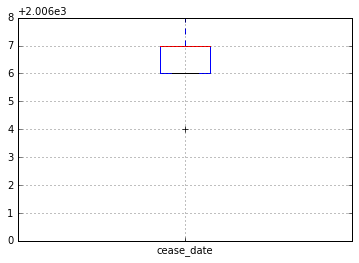

In [31]:
# won't show plot without it - https://stackoverflow.com/questions/35916976/plot-wont-show-in-jupyter
%matplotlib inline
# - https://stackoverflow.com/questions/40026391/python-pandas-box-plot-a-single-column
#won't recognize cease_date as column even though column in dete_resignations.columns - https://github.com/pandas-dev/pandas/issues/17275
dete_resignations.boxplot(column=['cease_date'], return_type='axes')

In [32]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

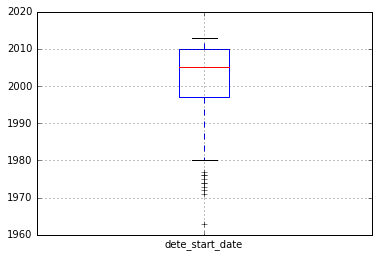

In [33]:
dete_resignations.boxplot(column=['dete_start_date'], return_type='axes') 

In [34]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

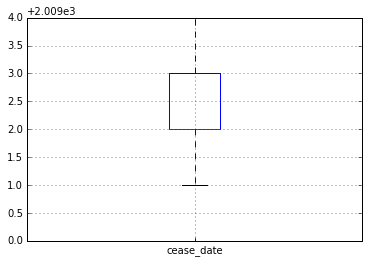

In [35]:
tafe_resignations.boxplot(column=['cease_date'], return_type='axes') 

- Dete cease dates range from 2006 - 2014
- Tafe cease dates range from 2009 - 2015
- Dete start dates range from 1963 - 2013
- This data falls in the range of 1940 to 2015 which sense as the dataframe was updated in 2019  

## Part VI - Creating a New Column

In [36]:
print(dete_resignations['dete_start_date'].dtype)
print(dete_resignations['cease_date'].dtype)

dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']

dete_resignations.head()

float64
float64


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


- In order to answer the question 'Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?' using both DETE and TAFE resignations exit surveys we need to combine both surveys and evaluate the employees years of service
- In order to combine the dataframes we need have an identically formatted column within both dataframes

## Part VII - Identify Dissatisfied Employees

In [37]:
tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']][11:16]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
16,NaN,NaN
17,-,Job Dissatisfaction
18,NaN,NaN
19,-,-
20,Contributing Factors. Dissatisfaction,Job Dissatisfaction


In [38]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [39]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [40]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val=='-':
        return False
    else:
        return True      

In [41]:
tafe_resignations['dissatisfied']=tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1,skipna=False)

In [42]:
dete_resignations['dissatisfied']=dete_resignations[[
    'job_dissatisfaction','dissatisfaction_with_the_department',
    'physical_work_environment','lack_of_recognition',
    'lack_of_job_security','work_location','employment_conditions',
    'work_life_balance','workload']].applymap(update_vals).any(axis=1,skipna=False)

In [43]:
dete_resignations_up=dete_resignations.copy()
tafe_resignations_up=tafe_resignations.copy()

-we used data in both dataframes that could indicate a reason for dissatisfaction in the job

## Part VIII - Combine the Data

In [44]:
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'

In [45]:
#How concat works
abc=pd.DataFrame([[1,2,3],[11,22,33]],columns=['first','second','third'])
abc.head()
dfe=pd.DataFrame([[4,5,6],[44,55,66]],columns=['firstA','secondB','thirdC'])
dfe.head()
zz=pd.concat([abc,dfe])
zz.head()
ign=pd.concat([abc,dfe],ignore_index=True)
ign.head()
#On top of one another
#ignore index makes it go from 0,1,0,1 to 1,2,3,4

,first,firstA,second,secondB,third,thirdC
0,1.0,NaN,2.0,NaN,3.0,NaN
1,11.0,NaN,22.0,NaN,33.0,NaN
2,NaN,4.0,NaN,5.0,NaN,6.0
3,NaN,44.0,NaN,55.0,NaN,66.0


In [46]:
combined=pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index=True)
combined.head()

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,...,role_service,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2006.0,Resignation,NaN,False,NaN,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1997.0,Resignation,NaN,False,NaN,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation,NaN,False,NaN,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2008.0,Resignation,NaN,False,NaN,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation,NaN,False,NaN,False,False,False,False


In [47]:
print(combined.shape)

(651, 53)


In [48]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [49]:
combined_updated=combined.dropna(axis=1,thresh=500).copy()
print(combined_updated.shape)

(651, 10)


- combined both dataframes in a stacked manner and redefine the index
- dropped columns with less than 500 non null values, which basically means if roughly 2/3<sup>rds</sup> of the column was filled with NaN values, the column was dropped

## Part IX - Clean the Service Column

In [50]:
combined_updated['institute_service']=combined_updated['institute_service'].astype('str')

In [51]:
combined_updated['institute_service'].dtype

dtype('O')

In [52]:
combined_updated['institute_service'].value_counts(dropna=False);

In [53]:
combined_updated['institute_service']=combined_updated['institute_service'].str.extract(r'(\d+)')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [69]:
combined_updated['institute_service'].value_counts(dropna=False);

In [55]:
combined_updated['institute_service']=combined_updated['institute_service'].astype('float');

In [67]:
combined_updated['institute_service'].dtype

dtype('float64')

In [58]:
def catag(val):
    if val < 3:
        return 'New'
    elif 3 <= val < 7:
        return 'Experienced'
    elif 7 <= val < 11:
        return 'Established'
    elif 11 <= val:
        return 'Veteran'
    elif pd.isnull(val):
        return np.nan

In [65]:
combined_updated['service_cat']=combined_updated['institute_service'].apply(catag)
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

- some years of service weren't numerical, yet ranges so we used those ranges across the whole dataframe in order to make it easier to analyze and more uniform throughout

## Part X - Perform Initial Analysis

In [71]:
combined_updated['dissatisfied'].value_counts(dropna=False)

True     402
False    241
NaN        8
Name: dissatisfied, dtype: int64

In [85]:
#fillna(True)
#converts all NaN value to True - chose this because it is the value that occurs most frequently in this column
#fillna(False)
#converts all NaN value to False
combined_updated['dissatisfied']=combined_updated['dissatisfied'].fillna(True)

In [92]:
pvt=pd.pivot_table(combined_updated, index='service_cat',values='dissatisfied')

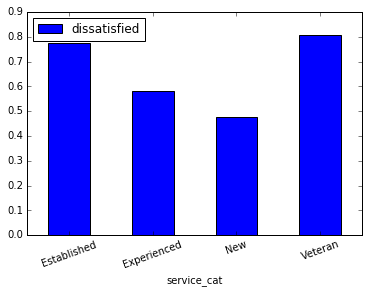

In [96]:
%matplotlib inline
pvt.plot(kind='bar',rot=20)

- Here we made a chart to visualize the dissatisfaction rate for each catagory of service time at the institute
- It is evident here that those that the level of dissatisfaction rises with the amount of service time at the institute
- more analysis is needed for a more conclusive result of this case study